In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [38]:
import scanpy as sc
import anndata as ad
import numpy as np

In [39]:
#import all datasets
mock_adata = sc.read_10x_mtx('/content/drive/MyDrive/Colab Notebooks/HackBio/Mock', prefix='GSM5082289_mock_')
day_one = sc.read_10x_mtx('/content/drive/MyDrive/Colab Notebooks/HackBio/1dpi', prefix='GSM5082290_1dpi_')
day_two = sc.read_10x_mtx('/content/drive/MyDrive/Colab Notebooks/HackBio/2dpi', prefix='GSM5082291_2dpi_')
day_three = sc.read_10x_mtx('/content/drive/MyDrive/Colab Notebooks/HackBio/3dpi', prefix='GSM5082292_3dpi_')

In [40]:
mock_adata.obs ['condition'] = 'mock'
day_one.obs ['condition'] = 'one'
day_two.obs ['condition'] = 'two'
day_three.obs ['condition'] = 'three'

In [41]:
print(mock_adata)
print(day_one)
print(day_two)
print(day_three)

AnnData object with n_obs × n_vars = 22609 × 33539
    obs: 'condition'
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 11834 × 33539
    obs: 'condition'
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 14695 × 33539
    obs: 'condition'
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 28530 × 33539
    obs: 'condition'
    var: 'gene_ids', 'feature_types'


In [42]:
#adata_List = [mock_data, day_one, day_two, day_three]
#adata = ad.concat(adata_List)

mock_adata.var.head()
day_one.var.head()
day_two.var.head()
day_three.var.head()

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [43]:
#Quality Control

In [44]:
#mock
mock_adata.var['MT'] = mock_adata.var_names.str.startswith(("MT-"))
mock_adata.var['RIBO'] = mock_adata.var_names.str.startswith(("RPS", "RPL"))
mock_adata.var['HB'] = mock_adata.var_names.str.startswith(("^HB[^(P)]"))

#day 1
day_one.var['MT'] = day_one.var_names.str.startswith(("MT-"))
day_one.var['RIBO'] = day_one.var_names.str.startswith(("RPS", "RPL"))
day_one.var['HB'] = day_one.var_names.str.startswith(("^HB[^(P)]"))

#day_two
day_two.var['MT'] = day_two.var_names.str.startswith(("MT-"))
day_two.var['RIBO'] = day_two.var_names.str.startswith(("RPS", "RPL"))
day_two.var['HB'] =day_two.var_names.str.startswith(("^HB[^(P)]"))

#day_three
day_three.var['MT'] = day_three.var_names.str.startswith(("MT-"))
day_three.var['RIBO'] = day_three.var_names.str.startswith(("RPS", "RPL"))
day_three.var['HB'] =day_three.var_names.str.startswith(("^HB[^(P)]"))



In [45]:
#mock
sc.pp.calculate_qc_metrics(
    mock_adata, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True
)

#day 1
sc.pp.calculate_qc_metrics(
    day_one, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True
)

#day 2
sc.pp.calculate_qc_metrics(
    day_two, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True
)

#day 3
sc.pp.calculate_qc_metrics(
    day_three, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True
)



In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (3,2) # Adjust figure size
plt.rcParams["axes.grid"] = True # Add grid to plots
plt.rcParams["axes.edgecolor"] = "black" # Set plot border color
plt.rcParams["axes.linewidth"] = 1.5 # Set plot border width
plt.rcParams["axes.facecolor"] = "white" #Set background color
plt.rcParams["axes.labelcolor"] = "black" # Set label color
plt.rcParams["xtick.color"] = "black" # Set x-axis tick color
plt.rcParams["ytick.color"] = "black" # Set y-axis tick color
plt.rcParams["text.color"] = "black" # Set text color
%matplotlib inline

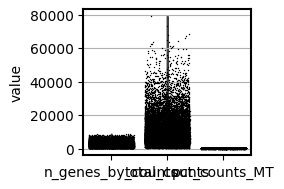

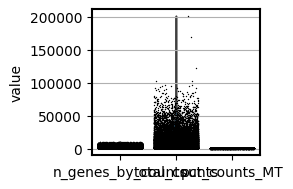

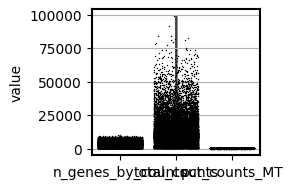

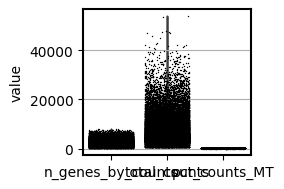

In [46]:
#mock
sc.pl.violin(
    mock_adata,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)

#day 1
sc.pl.violin(
    day_one,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)

#day 2
sc.pl.violin(
    day_two,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)

#day 3
sc.pl.violin(
    day_three,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)




In [47]:
#Normalisation

#mock
mock_adata.layers["counts"] = mock_adata.X.copy()
sc.pp.normalize_total(mock_adata)
sc.pp.log1p(mock_adata)

#day 1
day_one.layers["counts"] = day_one.X.copy()
sc.pp.normalize_total(day_one)
sc.pp.log1p(day_one)

#day 2
day_two.layers["counts"] = day_two.X.copy()
sc.pp.normalize_total(day_two)
sc.pp.log1p(day_two)

#day 3
day_three.layers["counts"] = day_three.X.copy()
sc.pp.normalize_total(day_three)
sc.pp.log1p(day_three)

In [48]:
import scanpy as sc

sc.pp.highly_variable_genes(mock_adata, n_top_genes=2000)
mock_adata = mock_adata[:, mock_adata.var['highly_variable']]

sc.pp.highly_variable_genes(day_one, n_top_genes=2000)
day_one = day_one[:, day_one.var['highly_variable']]

sc.pp.highly_variable_genes(day_two, n_top_genes=2000)
day_two = day_two[:, day_two.var['highly_variable']]

sc.pp.highly_variable_genes(day_three, n_top_genes=2000)
day_three = day_three[:, day_three.var['highly_variable']]


In [49]:
#Dim Reduction

sc.tl.pca(mock_adata)

sc.tl.pca(day_one)

sc.tl.pca(day_two)

sc.tl.pca(day_three)

#sc.tl.pca_variance_ratio(adata, n_pcs=10, log=False)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca


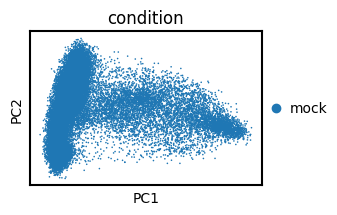

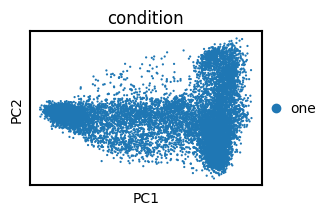

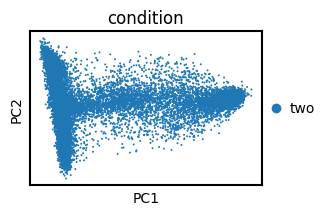

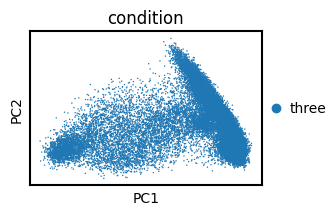

In [50]:
sc.pl.pca(mock_adata,
          color=["condition"],
          cmap="coolwarm")

sc.pl.pca(day_one,
          color=["condition"],
          cmap="coolwarm")

sc.pl.pca(day_two,
          color=["condition"],
          cmap="coolwarm")

sc.pl.pca(day_three,
          color=["condition"],
          cmap="coolwarm")

In [51]:
#mock
sc.pp.neighbors(mock_adata)
sc.tl.umap(mock_adata)

#day 1
sc.pp.neighbors(day_one)
sc.tl.umap(day_one)

#day 2
sc.pp.neighbors(day_two)
sc.tl.umap(day_two)

#day 3
sc.pp.neighbors(day_three)
sc.tl.umap(day_three)

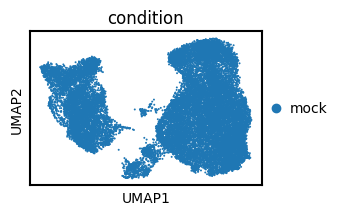

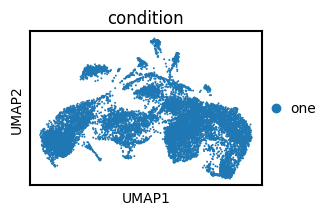

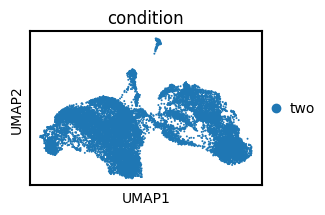

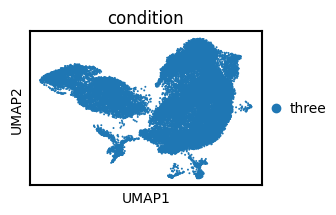

In [54]:
sc.pl.umap(
    mock_adata,
    color=["condition"],
    size=8,
)

sc.pl.umap(
    day_one,
    color=["condition"],
    size=8,
)

sc.pl.umap(
    day_two,
    color=["condition"],
    size=8,
)

sc.pl.umap(
    day_three,
    color=["condition"],
    size=8,
)

In [55]:
#mock
sc.tl.leiden(mock_adata, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)

#day 1
sc.tl.leiden(day_one, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)

#day 2
sc.tl.leiden(day_two, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)

#day 3
sc.tl.leiden(day_three, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)


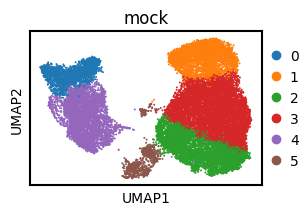

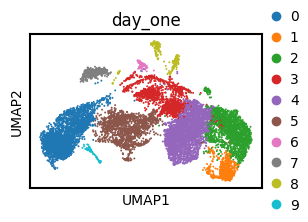

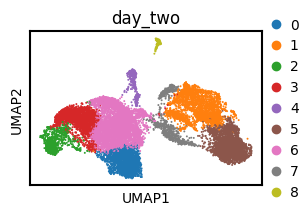

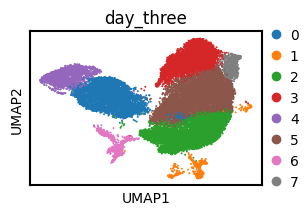

In [56]:
sc.pl.umap(
    mock_adata,
    color=["leiden_res_"],
    size=8,
    title="mock"
)

sc.pl.umap(
    day_one,
    color=["leiden_res_"],
    size=8,
    title="day_one"
)

sc.pl.umap(
    day_two,
    color=["leiden_res_"],
    size=8,
    title="day_two"
)

sc.pl.umap(
    day_three,
    color=["leiden_res_"],
    size=8,
    title="day_three"
)

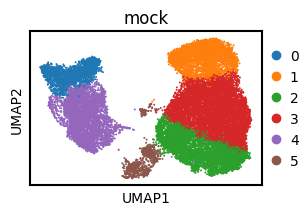

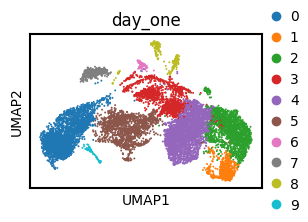

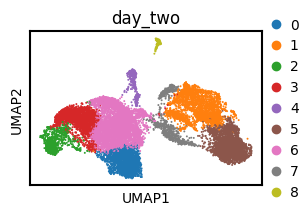

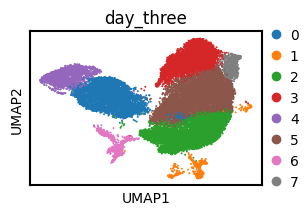

In [59]:
sc.pl.umap(
    mock_adata,
    color=["leiden_res_"],
    size=8,
    title="mock"
)

sc.pl.umap(
    day_one,
    color=["leiden_res_"],
    size=8,
    title="day_one"
)

sc.pl.umap(
    day_two,
    color=["leiden_res_"],
    size=8,
    title="day_two"
)

sc.pl.umap(
    day_three,
    color=["leiden_res_"],
    size=8,
    title="day_three"
)

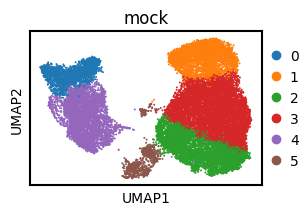

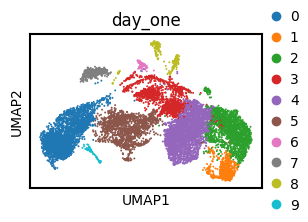

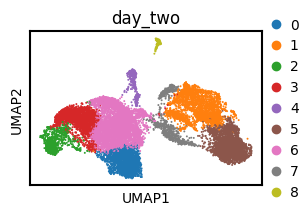

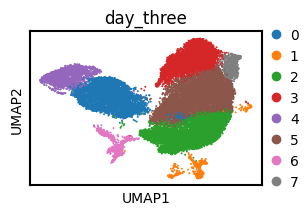

In [61]:
sc.pl.umap(
    mock_adata,
    color=["leiden_res_"],
    size=8,
    title="mock"
)

sc.pl.umap(
    day_one,
    color=["leiden_res_"],
    size=8,
    title="day_one"
)

sc.pl.umap(
    day_two,
    color=["leiden_res_"],
    size=8,
    title="day_two"
)

sc.pl.umap(
    day_three,
    color=["leiden_res_"],
    size=8,
    title="day_three"
)

In [62]:
import decoupler as dc

In [63]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers [~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [65]:
dc.mt.ulm(data=mock_adata,
          net=markers,
          tmin = 3)

In [66]:
dc.mt.ulm(data=day_one,
          net=markers,
          tmin = 3)

In [67]:
dc.mt.ulm(data=day_two,
          net=markers,
          tmin = 3)

In [68]:
dc.mt.ulm(data=day_three,
          net=markers,
          tmin = 3)

In [70]:
score_mock = mock_adata.obsm["score_ulm"]

In [71]:
score_1 = day_one.obsm["score_ulm"]

In [72]:
score_2 = day_two.obsm["score_ulm"]

In [73]:
score_3 = day_three.obsm["score_ulm"]

In [79]:
import pandas as pd

#rank genes

## mock
temp_adata_mock = ad.AnnData(X=score_mock.values, obs=mock_adata.obs.copy(), var=pd.DataFrame(index=score_mock.columns))
mock_adata_gene_rank = dc.tl.rankby_group(temp_adata_mock, groupby="leiden_res_", reference="rest", method="t-test_overestim_var")
mock_adata_gene_rank = mock_adata_gene_rank[mock_adata_gene_rank["stat"] > 0]
mock_adata_gene_rank.head(5)

## day 1
temp_adata_one = ad.AnnData(X=score_1.values, obs=day_one.obs.copy(), var=pd.DataFrame(index=score_1.columns))
one_adata_gene_rank = dc.tl.rankby_group(temp_adata_one, groupby="leiden_res_", reference="rest", method="t-test_overestim_var")
one_adata_gene_rank = one_adata_gene_rank[one_adata_gene_rank["stat"] > 0]
one_adata_gene_rank.head(5)

## day 2
temp_adata_two = ad.AnnData(X=score_2.values, obs=day_two.obs.copy(), var=pd.DataFrame(index=score_2.columns))
two_adata_gene_rank = dc.tl.rankby_group(temp_adata_two, groupby="leiden_res_", reference="rest", method="t-test_overestim_var")
two_adata_gene_rank = two_adata_gene_rank[two_adata_gene_rank["stat"]> 0]
two_adata_gene_rank.head(5)

## day 3
temp_adata_three = ad.AnnData(X=score_3.values, obs=day_three.obs.copy(), var=pd.DataFrame(index=score_3.columns))
three_adata_gene_rank = dc.tl.rankby_group(temp_adata_three, groupby="leiden_res_", reference="rest", method="t-test_overestim_var")
three_adata_gene_rank = three_adata_gene_rank[three_adata_gene_rank["stat"] > 0]
three_adata_gene_rank.head(5)

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Olfactory epithelial cells,74.862739,1.920081,0.0,0.0
1,0,rest,Germ cells,74.246374,2.001041,0.0,0.0
2,0,rest,Ependymal cells,71.595056,2.945981,0.0,0.0
3,0,rest,Ciliated cells,57.631798,1.441314,0.0,0.0
4,0,rest,Oligodendrocytes,46.768275,0.707412,0.0,0.0


In [80]:
#mock
top_cell_type_per_group_mock = mock_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_mock.to_dict())

#day 1
top_cell_type_per_group_1 = one_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_1.to_dict())

#day 2
top_cell_type_per_group_2 = two_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_2.to_dict())

#day 3
top_cell_type_per_group_3 = three_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_3.to_dict())

/tmp/ipython-input-4220782143.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_mock = mock_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 0): 'Olfactory epithelial cells',
 ('1', 83): 'Salivary mucous cells',
 ('2', 166): 'Luminal epithelial cells',
 ('3', 249): 'Epithelial cells',
 ('4', 332): 'Ependymal cells',
 ('5', 444): 'Photoreceptor cells'}

/tmp/ipython-input-4220782143.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_1 = one_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 0): 'Germ cells',
 ('1', 93): 'Myoepithelial cells',
 ('2', 186): 'T memory cells',
 ('3', 279): 'T helper cells',
 ('4', 372): 'Cholangiocytes',
 ('5', 470): 'Astrocytes',
 ('6', 558): 'Acinar cells',
 ('7', 654): 'Germ cells',
 ('8', 744): 'Tanycytes',
 ('9', 846): 'T cells'}

/tmp/ipython-input-4220782143.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_2 = two_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 0): 'Cholangiocytes',
 ('1', 94): 'Olfactory epithelial cells',
 ('2', 188): 'Myoepithelial cells',
 ('3', 282): 'Epithelial cells',
 ('4', 376): 'Hematopoietic stem cells',
 ('5', 470): 'Olfactory epithelial cells',
 ('6', 564): 'Luminal epithelial cells',
 ('7', 666): 'Germ cells',
 ('8', 752): 'Hepatocytes'}

/tmp/ipython-input-4220782143.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_3 = three_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 0): 'Olfactory epithelial cells',
 ('1', 94): 'Neurons',
 ('2', 188): 'Luminal epithelial cells',
 ('3', 282): 'Basal cells',
 ('4', 376): 'Olfactory epithelial cells',
 ('5', 470): 'Epithelial cells',
 ('6', 583): 'Smooth muscle cells',
 ('7', 658): 'Schwann cells'}

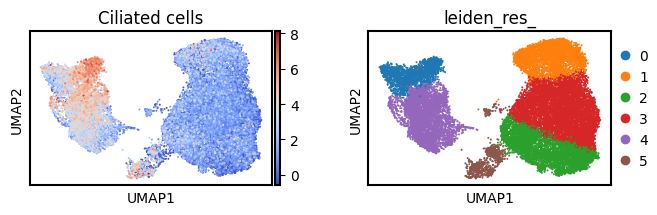

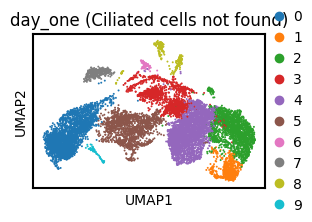

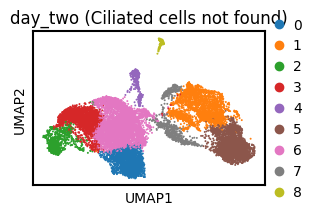

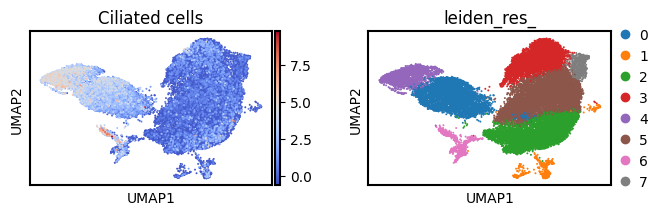

In [83]:
if 'Ciliated cells' in score_mock.columns:
    mock_adata.obs['Ciliated cells'] = score_mock['Ciliated cells']
    sc.pl.umap(
        mock_adata,
        color=["Ciliated cells", "leiden_res_"],
        size=8,
        cmap="coolwarm"
    )
else:
    sc.pl.umap(
        mock_adata,
        color=["leiden_res_"],
        size=8,
        cmap="coolwarm",
        title="mock (Ciliated cells not found)"
    )

if 'Ciliated cells' in score_1.columns:
    day_one.obs['Ciliated cells'] = score_1['Ciliated cells']
    sc.pl.umap(
        day_one,
        color=["Ciliated cells", "leiden_res_"],
        size=8,
        cmap="coolwarm"
    )
else:
    sc.pl.umap(
        day_one,
        color=["leiden_res_"],
        size=8,
        cmap="coolwarm",
        title="day_one (Ciliated cells not found)"
    )

if 'Ciliated cells' in score_2.columns:
    day_two.obs['Ciliated cells'] = score_2['Ciliated cells']
    sc.pl.umap(
        day_two,
        color=["Ciliated cells", "leiden_res_"],
        size=8,
        cmap="coolwarm"
    )
else:
    sc.pl.umap(
        day_two,
        color=["leiden_res_"],
        size=8,
        cmap="coolwarm",
        title="day_two (Ciliated cells not found)"
    )

if 'Ciliated cells' in score_3.columns:
    day_three.obs['Ciliated cells'] = score_3['Ciliated cells']
    sc.pl.umap(
        day_three,
        color=["Ciliated cells", "leiden_res_"],
        size=8,
        cmap="coolwarm"
    )
else:
    sc.pl.umap(
        day_three,
        color=["leiden_res_"],
        size=8,
        cmap="coolwarm",
        title="day_three (Ciliated cells not found)"
    )